# Normal Model

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import skimage
import numpy as np
import matplotlib.pyplot as plt
import argparse
from skimage.util import random_noise
from torchvision.utils import save_image
import torch.nn as nn
import torch.nn.functional as F

/opt/anaconda3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so, 6): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/torchvision/image.so
  Reason: Incompatible library version: image.so requires version 15.0.0 or later, but libjpeg.9.dylib provides version 14.0.0
  warn(f"Failed to load image Python extension: {e}")


In [2]:
train= datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
train[59999][0].shape

In [3]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [4]:
x,y = data[0][0],data[1][0]
print(y)

tensor(5)


<function matplotlib.pyplot.show(close=None, block=None)>

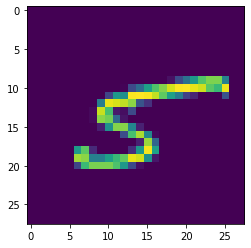

In [5]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show

In [6]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) ##784 = 28*28, the flatten image
        self.fc2 = nn.Linear(64, 64) #64 is the hidden layers, so from fc1 we take in 64, and then output 64
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) #we have 10 classes, so 10 output
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #we don't want to run relu here because we are not doing anything with the 10 output
        
        return F.log_softmax(x,dim=1) #dimension = 1 because the layer is
    
        
net = Net()
print(net)


      

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.rand((28,28))
X = X.view(1,28*28)

In [9]:
output = net(X)
output

tensor([[-2.2537, -2.2188, -2.2735, -2.3758, -2.2856, -2.3838, -2.4353, -2.2701,
         -2.2889, -2.2616]], grad_fn=<LogSoftmaxBackward0>)

In [10]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001) #we optimize for loss, and accurary follows

EPOCHS = 3 #Epoch known as a full pass through, we are making 3 whole passes here.

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X,y = data
        #print(X[0])
        #print(y[0])
        #we get rows of pixels when printing
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y) 
        loss.backward() #backpropergate
        optimizer.step()
        print(loss)


tensor(2.3049, grad_fn=<NllLossBackward0>)
tensor(2.2946, grad_fn=<NllLossBackward0>)
tensor(2.2857, grad_fn=<NllLossBackward0>)
tensor(2.2940, grad_fn=<NllLossBackward0>)
tensor(2.2798, grad_fn=<NllLossBackward0>)
tensor(2.2972, grad_fn=<NllLossBackward0>)
tensor(2.2713, grad_fn=<NllLossBackward0>)
tensor(2.2744, grad_fn=<NllLossBackward0>)
tensor(2.2307, grad_fn=<NllLossBackward0>)
tensor(2.2347, grad_fn=<NllLossBackward0>)
tensor(2.2692, grad_fn=<NllLossBackward0>)
tensor(2.2547, grad_fn=<NllLossBackward0>)
tensor(2.3240, grad_fn=<NllLossBackward0>)
tensor(2.2804, grad_fn=<NllLossBackward0>)
tensor(2.2482, grad_fn=<NllLossBackward0>)
tensor(2.2729, grad_fn=<NllLossBackward0>)
tensor(2.2309, grad_fn=<NllLossBackward0>)
tensor(2.2446, grad_fn=<NllLossBackward0>)
tensor(2.2465, grad_fn=<NllLossBackward0>)
tensor(2.1841, grad_fn=<NllLossBackward0>)
tensor(2.1783, grad_fn=<NllLossBackward0>)
tensor(2.2442, grad_fn=<NllLossBackward0>)
tensor(2.2048, grad_fn=<NllLossBackward0>)
tensor(2.22

tensor(0.1808, grad_fn=<NllLossBackward0>)
tensor(1.2380, grad_fn=<NllLossBackward0>)
tensor(1.0393, grad_fn=<NllLossBackward0>)
tensor(0.8297, grad_fn=<NllLossBackward0>)
tensor(1.0413, grad_fn=<NllLossBackward0>)
tensor(0.3906, grad_fn=<NllLossBackward0>)
tensor(0.4125, grad_fn=<NllLossBackward0>)
tensor(0.2572, grad_fn=<NllLossBackward0>)
tensor(0.4809, grad_fn=<NllLossBackward0>)
tensor(0.4751, grad_fn=<NllLossBackward0>)
tensor(0.6953, grad_fn=<NllLossBackward0>)
tensor(0.2940, grad_fn=<NllLossBackward0>)
tensor(0.5802, grad_fn=<NllLossBackward0>)
tensor(0.7182, grad_fn=<NllLossBackward0>)
tensor(0.5490, grad_fn=<NllLossBackward0>)
tensor(0.2342, grad_fn=<NllLossBackward0>)
tensor(0.5522, grad_fn=<NllLossBackward0>)
tensor(0.3394, grad_fn=<NllLossBackward0>)
tensor(0.7909, grad_fn=<NllLossBackward0>)
tensor(0.8291, grad_fn=<NllLossBackward0>)
tensor(0.3115, grad_fn=<NllLossBackward0>)
tensor(1.5115, grad_fn=<NllLossBackward0>)
tensor(0.5620, grad_fn=<NllLossBackward0>)
tensor(1.83

tensor(0.2894, grad_fn=<NllLossBackward0>)
tensor(0.5595, grad_fn=<NllLossBackward0>)
tensor(0.6435, grad_fn=<NllLossBackward0>)
tensor(0.1671, grad_fn=<NllLossBackward0>)
tensor(0.7573, grad_fn=<NllLossBackward0>)
tensor(0.1345, grad_fn=<NllLossBackward0>)
tensor(0.3359, grad_fn=<NllLossBackward0>)
tensor(0.1446, grad_fn=<NllLossBackward0>)
tensor(0.2768, grad_fn=<NllLossBackward0>)
tensor(0.3415, grad_fn=<NllLossBackward0>)
tensor(0.5023, grad_fn=<NllLossBackward0>)
tensor(1.1350, grad_fn=<NllLossBackward0>)
tensor(0.7891, grad_fn=<NllLossBackward0>)
tensor(0.0774, grad_fn=<NllLossBackward0>)
tensor(0.2933, grad_fn=<NllLossBackward0>)
tensor(0.3049, grad_fn=<NllLossBackward0>)
tensor(0.4205, grad_fn=<NllLossBackward0>)
tensor(0.5842, grad_fn=<NllLossBackward0>)
tensor(0.2126, grad_fn=<NllLossBackward0>)
tensor(0.2573, grad_fn=<NllLossBackward0>)
tensor(0.1707, grad_fn=<NllLossBackward0>)
tensor(0.3814, grad_fn=<NllLossBackward0>)
tensor(0.3536, grad_fn=<NllLossBackward0>)
tensor(0.44

tensor(0.4298, grad_fn=<NllLossBackward0>)
tensor(0.2000, grad_fn=<NllLossBackward0>)
tensor(0.3171, grad_fn=<NllLossBackward0>)
tensor(0.5245, grad_fn=<NllLossBackward0>)
tensor(0.5040, grad_fn=<NllLossBackward0>)
tensor(0.1493, grad_fn=<NllLossBackward0>)
tensor(0.7819, grad_fn=<NllLossBackward0>)
tensor(0.4546, grad_fn=<NllLossBackward0>)
tensor(0.2309, grad_fn=<NllLossBackward0>)
tensor(0.0762, grad_fn=<NllLossBackward0>)
tensor(0.0632, grad_fn=<NllLossBackward0>)
tensor(0.4159, grad_fn=<NllLossBackward0>)
tensor(0.7463, grad_fn=<NllLossBackward0>)
tensor(0.7548, grad_fn=<NllLossBackward0>)
tensor(0.0744, grad_fn=<NllLossBackward0>)
tensor(0.1162, grad_fn=<NllLossBackward0>)
tensor(0.1947, grad_fn=<NllLossBackward0>)
tensor(0.7169, grad_fn=<NllLossBackward0>)
tensor(0.3255, grad_fn=<NllLossBackward0>)
tensor(0.0945, grad_fn=<NllLossBackward0>)
tensor(0.2369, grad_fn=<NllLossBackward0>)
tensor(0.5180, grad_fn=<NllLossBackward0>)
tensor(0.3205, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.1464, grad_fn=<NllLossBackward0>)
tensor(0.1929, grad_fn=<NllLossBackward0>)
tensor(0.4878, grad_fn=<NllLossBackward0>)
tensor(0.1888, grad_fn=<NllLossBackward0>)
tensor(0.1175, grad_fn=<NllLossBackward0>)
tensor(0.8198, grad_fn=<NllLossBackward0>)
tensor(0.4815, grad_fn=<NllLossBackward0>)
tensor(0.3306, grad_fn=<NllLossBackward0>)
tensor(0.2155, grad_fn=<NllLossBackward0>)
tensor(0.4441, grad_fn=<NllLossBackward0>)
tensor(0.0358, grad_fn=<NllLossBackward0>)
tensor(0.4698, grad_fn=<NllLossBackward0>)
tensor(0.3601, grad_fn=<NllLossBackward0>)
tensor(0.3061, grad_fn=<NllLossBackward0>)
tensor(0.0793, grad_fn=<NllLossBackward0>)
tensor(0.0992, grad_fn=<NllLossBackward0>)
tensor(0.2077, grad_fn=<NllLossBackward0>)
tensor(0.0926, grad_fn=<NllLossBackward0>)
tensor(0.1906, grad_fn=<NllLossBackward0>)
tensor(0.0822, grad_fn=<NllLossBackward0>)
tensor(0.1539, grad_fn=<NllLossBackward0>)
tensor(0.6126, grad_fn=<NllLossBackward0>)
tensor(0.3170, grad_fn=<NllLossBackward0>)
tensor(0.89

tensor(0.9090, grad_fn=<NllLossBackward0>)
tensor(0.2752, grad_fn=<NllLossBackward0>)
tensor(0.0621, grad_fn=<NllLossBackward0>)
tensor(0.2066, grad_fn=<NllLossBackward0>)
tensor(1.2876, grad_fn=<NllLossBackward0>)
tensor(0.4517, grad_fn=<NllLossBackward0>)
tensor(0.4109, grad_fn=<NllLossBackward0>)
tensor(0.1331, grad_fn=<NllLossBackward0>)
tensor(0.2296, grad_fn=<NllLossBackward0>)
tensor(0.3759, grad_fn=<NllLossBackward0>)
tensor(0.1752, grad_fn=<NllLossBackward0>)
tensor(0.1454, grad_fn=<NllLossBackward0>)
tensor(0.0829, grad_fn=<NllLossBackward0>)
tensor(0.1906, grad_fn=<NllLossBackward0>)
tensor(0.0540, grad_fn=<NllLossBackward0>)
tensor(0.3031, grad_fn=<NllLossBackward0>)
tensor(0.2256, grad_fn=<NllLossBackward0>)
tensor(0.0834, grad_fn=<NllLossBackward0>)
tensor(0.3215, grad_fn=<NllLossBackward0>)
tensor(0.1669, grad_fn=<NllLossBackward0>)
tensor(0.1109, grad_fn=<NllLossBackward0>)
tensor(0.0716, grad_fn=<NllLossBackward0>)
tensor(0.0836, grad_fn=<NllLossBackward0>)
tensor(0.47

tensor(0.2972, grad_fn=<NllLossBackward0>)
tensor(0.1874, grad_fn=<NllLossBackward0>)
tensor(0.4459, grad_fn=<NllLossBackward0>)
tensor(0.2960, grad_fn=<NllLossBackward0>)
tensor(0.0388, grad_fn=<NllLossBackward0>)
tensor(0.3276, grad_fn=<NllLossBackward0>)
tensor(0.1809, grad_fn=<NllLossBackward0>)
tensor(0.0129, grad_fn=<NllLossBackward0>)
tensor(0.0810, grad_fn=<NllLossBackward0>)
tensor(0.4969, grad_fn=<NllLossBackward0>)
tensor(0.0852, grad_fn=<NllLossBackward0>)
tensor(0.1885, grad_fn=<NllLossBackward0>)
tensor(0.0436, grad_fn=<NllLossBackward0>)
tensor(0.1992, grad_fn=<NllLossBackward0>)
tensor(0.2806, grad_fn=<NllLossBackward0>)
tensor(0.0956, grad_fn=<NllLossBackward0>)
tensor(0.5964, grad_fn=<NllLossBackward0>)
tensor(0.7927, grad_fn=<NllLossBackward0>)
tensor(0.6386, grad_fn=<NllLossBackward0>)
tensor(0.1886, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0941, grad_fn=<NllLossBackward0>)
tensor(0.1682, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.6343, grad_fn=<NllLossBackward0>)
tensor(0.0420, grad_fn=<NllLossBackward0>)
tensor(0.2345, grad_fn=<NllLossBackward0>)
tensor(0.1209, grad_fn=<NllLossBackward0>)
tensor(0.2994, grad_fn=<NllLossBackward0>)
tensor(0.6439, grad_fn=<NllLossBackward0>)
tensor(0.2654, grad_fn=<NllLossBackward0>)
tensor(0.7192, grad_fn=<NllLossBackward0>)
tensor(0.6146, grad_fn=<NllLossBackward0>)
tensor(0.2507, grad_fn=<NllLossBackward0>)
tensor(0.3618, grad_fn=<NllLossBackward0>)
tensor(0.2387, grad_fn=<NllLossBackward0>)
tensor(0.1395, grad_fn=<NllLossBackward0>)
tensor(0.2207, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.7159, grad_fn=<NllLossBackward0>)
tensor(0.0536, grad_fn=<NllLossBackward0>)
tensor(0.1000, grad_fn=<NllLossBackward0>)
tensor(0.6643, grad_fn=<NllLossBackward0>)
tensor(0.7707, grad_fn=<NllLossBackward0>)
tensor(0.5028, grad_fn=<NllLossBackward0>)
tensor(0.3482, grad_fn=<NllLossBackward0>)
tensor(0.0145, grad_fn=<NllLossBackward0>)
tensor(0.20

tensor(0.4876, grad_fn=<NllLossBackward0>)
tensor(0.0674, grad_fn=<NllLossBackward0>)
tensor(0.0845, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.1252, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.0728, grad_fn=<NllLossBackward0>)
tensor(0.3373, grad_fn=<NllLossBackward0>)
tensor(0.6634, grad_fn=<NllLossBackward0>)
tensor(0.1085, grad_fn=<NllLossBackward0>)
tensor(0.3455, grad_fn=<NllLossBackward0>)
tensor(0.0623, grad_fn=<NllLossBackward0>)
tensor(0.4670, grad_fn=<NllLossBackward0>)
tensor(0.0332, grad_fn=<NllLossBackward0>)
tensor(0.9177, grad_fn=<NllLossBackward0>)
tensor(0.2357, grad_fn=<NllLossBackward0>)
tensor(0.0523, grad_fn=<NllLossBackward0>)
tensor(0.0718, grad_fn=<NllLossBackward0>)
tensor(0.0659, grad_fn=<NllLossBackward0>)
tensor(0.1314, grad_fn=<NllLossBackward0>)
tensor(0.3843, grad_fn=<NllLossBackward0>)
tensor(0.1188, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.56

tensor(0.8730, grad_fn=<NllLossBackward0>)
tensor(0.2523, grad_fn=<NllLossBackward0>)
tensor(0.0246, grad_fn=<NllLossBackward0>)
tensor(0.4476, grad_fn=<NllLossBackward0>)
tensor(0.0468, grad_fn=<NllLossBackward0>)
tensor(0.2393, grad_fn=<NllLossBackward0>)
tensor(0.1506, grad_fn=<NllLossBackward0>)
tensor(0.1547, grad_fn=<NllLossBackward0>)
tensor(0.3809, grad_fn=<NllLossBackward0>)
tensor(0.2210, grad_fn=<NllLossBackward0>)
tensor(0.2495, grad_fn=<NllLossBackward0>)
tensor(0.8460, grad_fn=<NllLossBackward0>)
tensor(0.3190, grad_fn=<NllLossBackward0>)
tensor(0.4764, grad_fn=<NllLossBackward0>)
tensor(0.0507, grad_fn=<NllLossBackward0>)
tensor(0.2546, grad_fn=<NllLossBackward0>)
tensor(0.0764, grad_fn=<NllLossBackward0>)
tensor(0.1067, grad_fn=<NllLossBackward0>)
tensor(0.4757, grad_fn=<NllLossBackward0>)
tensor(0.0843, grad_fn=<NllLossBackward0>)
tensor(0.3447, grad_fn=<NllLossBackward0>)
tensor(0.0549, grad_fn=<NllLossBackward0>)
tensor(0.3103, grad_fn=<NllLossBackward0>)
tensor(0.20

tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.0597, grad_fn=<NllLossBackward0>)
tensor(0.0442, grad_fn=<NllLossBackward0>)
tensor(0.0560, grad_fn=<NllLossBackward0>)
tensor(0.1692, grad_fn=<NllLossBackward0>)
tensor(0.5480, grad_fn=<NllLossBackward0>)
tensor(0.1121, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)
tensor(0.0357, grad_fn=<NllLossBackward0>)
tensor(0.1244, grad_fn=<NllLossBackward0>)
tensor(0.3911, grad_fn=<NllLossBackward0>)
tensor(0.0425, grad_fn=<NllLossBackward0>)
tensor(0.1483, grad_fn=<NllLossBackward0>)
tensor(0.0509, grad_fn=<NllLossBackward0>)
tensor(0.0137, grad_fn=<NllLossBackward0>)
tensor(0.8500, grad_fn=<NllLossBackward0>)
tensor(0.1309, grad_fn=<NllLossBackward0>)
tensor(0.4770, grad_fn=<NllLossBackward0>)
tensor(0.1146, grad_fn=<NllLossBackward0>)
tensor(0.0578, grad_fn=<NllLossBackward0>)
tensor(0.6129, grad_fn=<NllLossBackward0>)
tensor(0.1633, grad_fn=<NllLossBackward0>)
tensor(0.0839, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.2633, grad_fn=<NllLossBackward0>)
tensor(0.1301, grad_fn=<NllLossBackward0>)
tensor(0.2704, grad_fn=<NllLossBackward0>)
tensor(0.0431, grad_fn=<NllLossBackward0>)
tensor(0.1795, grad_fn=<NllLossBackward0>)
tensor(0.0771, grad_fn=<NllLossBackward0>)
tensor(0.2106, grad_fn=<NllLossBackward0>)
tensor(0.2965, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.0203, grad_fn=<NllLossBackward0>)
tensor(0.2950, grad_fn=<NllLossBackward0>)
tensor(0.0778, grad_fn=<NllLossBackward0>)
tensor(0.0606, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.4850, grad_fn=<NllLossBackward0>)
tensor(0.3519, grad_fn=<NllLossBackward0>)
tensor(0.0221, grad_fn=<NllLossBackward0>)
tensor(0.4196, grad_fn=<NllLossBackward0>)
tensor(0.0604, grad_fn=<NllLossBackward0>)
tensor(0.2141, grad_fn=<NllLossBackward0>)
tensor(0.1046, grad_fn=<NllLossBackward0>)
tensor(0.0295, grad_fn=<NllLossBackward0>)
tensor(0.4544, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.0320, grad_fn=<NllLossBackward0>)
tensor(0.0767, grad_fn=<NllLossBackward0>)
tensor(0.1464, grad_fn=<NllLossBackward0>)
tensor(0.3525, grad_fn=<NllLossBackward0>)
tensor(0.1978, grad_fn=<NllLossBackward0>)
tensor(0.4307, grad_fn=<NllLossBackward0>)
tensor(0.5847, grad_fn=<NllLossBackward0>)
tensor(0.3672, grad_fn=<NllLossBackward0>)
tensor(0.1264, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.7732, grad_fn=<NllLossBackward0>)
tensor(0.0434, grad_fn=<NllLossBackward0>)
tensor(0.5430, grad_fn=<NllLossBackward0>)
tensor(0.4059, grad_fn=<NllLossBackward0>)
tensor(0.3278, grad_fn=<NllLossBackward0>)
tensor(0.5124, grad_fn=<NllLossBackward0>)
tensor(0.0397, grad_fn=<NllLossBackward0>)
tensor(0.2159, grad_fn=<NllLossBackward0>)
tensor(0.0553, grad_fn=<NllLossBackward0>)
tensor(0.1630, grad_fn=<NllLossBackward0>)
tensor(0.2377, grad_fn=<NllLossBackward0>)
tensor(0.0975, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.42

tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.1005, grad_fn=<NllLossBackward0>)
tensor(1.0961, grad_fn=<NllLossBackward0>)
tensor(0.0592, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.4519, grad_fn=<NllLossBackward0>)
tensor(0.1684, grad_fn=<NllLossBackward0>)
tensor(0.1370, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0790, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.1978, grad_fn=<NllLossBackward0>)
tensor(0.0316, grad_fn=<NllLossBackward0>)
tensor(0.6104, grad_fn=<NllLossBackward0>)
tensor(0.2893, grad_fn=<NllLossBackward0>)
tensor(0.2542, grad_fn=<NllLossBackward0>)
tensor(0.5607, grad_fn=<NllLossBackward0>)
tensor(0.1022, grad_fn=<NllLossBackward0>)
tensor(0.5206, grad_fn=<NllLossBackward0>)
tensor(0.2040, grad_fn=<NllLossBackward0>)
tensor(0.1530, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.54

tensor(0.2265, grad_fn=<NllLossBackward0>)
tensor(0.1342, grad_fn=<NllLossBackward0>)
tensor(0.0891, grad_fn=<NllLossBackward0>)
tensor(0.0859, grad_fn=<NllLossBackward0>)
tensor(0.1982, grad_fn=<NllLossBackward0>)
tensor(0.1756, grad_fn=<NllLossBackward0>)
tensor(0.0455, grad_fn=<NllLossBackward0>)
tensor(0.6670, grad_fn=<NllLossBackward0>)
tensor(0.4835, grad_fn=<NllLossBackward0>)
tensor(0.0393, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.4787, grad_fn=<NllLossBackward0>)
tensor(0.0498, grad_fn=<NllLossBackward0>)
tensor(0.0407, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.0511, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.6901, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0783, grad_fn=<NllLossBackward0>)
tensor(0.16

tensor(0.0304, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.1347, grad_fn=<NllLossBackward0>)
tensor(0.0329, grad_fn=<NllLossBackward0>)
tensor(0.0567, grad_fn=<NllLossBackward0>)
tensor(0.6773, grad_fn=<NllLossBackward0>)
tensor(0.0705, grad_fn=<NllLossBackward0>)
tensor(0.4237, grad_fn=<NllLossBackward0>)
tensor(0.1294, grad_fn=<NllLossBackward0>)
tensor(0.3974, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.0832, grad_fn=<NllLossBackward0>)
tensor(0.0677, grad_fn=<NllLossBackward0>)
tensor(0.0526, grad_fn=<NllLossBackward0>)
tensor(0.0261, grad_fn=<NllLossBackward0>)
tensor(0.0868, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.2698, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.3569, grad_fn=<NllLossBackward0>)
tensor(0.0295, grad_fn=<NllLossBackward0>)
tensor(0.3207, grad_fn=<NllLossBackward0>)
tensor(0.24

tensor(0.0163, grad_fn=<NllLossBackward0>)
tensor(0.4839, grad_fn=<NllLossBackward0>)
tensor(0.4281, grad_fn=<NllLossBackward0>)
tensor(0.0872, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0874, grad_fn=<NllLossBackward0>)
tensor(0.0544, grad_fn=<NllLossBackward0>)
tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.4591, grad_fn=<NllLossBackward0>)
tensor(0.8953, grad_fn=<NllLossBackward0>)
tensor(0.1363, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.3461, grad_fn=<NllLossBackward0>)
tensor(0.2537, grad_fn=<NllLossBackward0>)
tensor(0.0499, grad_fn=<NllLossBackward0>)
tensor(0.0900, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.1139, grad_fn=<NllLossBackward0>)
tensor(0.3415, grad_fn=<NllLossBackward0>)
tensor(0.0354, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0238, grad_fn=<NllLossBackward0>)
tensor(0.24

tensor(0.2771, grad_fn=<NllLossBackward0>)
tensor(0.3212, grad_fn=<NllLossBackward0>)
tensor(0.0588, grad_fn=<NllLossBackward0>)
tensor(0.5377, grad_fn=<NllLossBackward0>)
tensor(0.0445, grad_fn=<NllLossBackward0>)
tensor(0.0208, grad_fn=<NllLossBackward0>)
tensor(0.4585, grad_fn=<NllLossBackward0>)
tensor(0.2547, grad_fn=<NllLossBackward0>)
tensor(0.3736, grad_fn=<NllLossBackward0>)
tensor(0.0824, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.2150, grad_fn=<NllLossBackward0>)
tensor(0.2672, grad_fn=<NllLossBackward0>)
tensor(0.4612, grad_fn=<NllLossBackward0>)
tensor(0.8306, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.4572, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.2049, grad_fn=<NllLossBackward0>)
tensor(0.0931, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.1016, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.0873, grad_fn=<NllLossBackward0>)
tensor(0.1205, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.2786, grad_fn=<NllLossBackward0>)
tensor(0.2366, grad_fn=<NllLossBackward0>)
tensor(0.2229, grad_fn=<NllLossBackward0>)
tensor(0.0342, grad_fn=<NllLossBackward0>)
tensor(0.1189, grad_fn=<NllLossBackward0>)
tensor(0.1404, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.0852, grad_fn=<NllLossBackward0>)
tensor(0.3182, grad_fn=<NllLossBackward0>)
tensor(0.0771, grad_fn=<NllLossBackward0>)
tensor(0.0471, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.1378, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.2894, grad_fn=<NllLossBackward0>)
tensor(0.0605, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.8191, grad_fn=<NllLossBackward0>)
tensor(0.54

tensor(0.2384, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.3213, grad_fn=<NllLossBackward0>)
tensor(0.5417, grad_fn=<NllLossBackward0>)
tensor(0.0956, grad_fn=<NllLossBackward0>)
tensor(0.3509, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.6884, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.1514, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.0279, grad_fn=<NllLossBackward0>)
tensor(0.0352, grad_fn=<NllLossBackward0>)
tensor(0.0271, grad_fn=<NllLossBackward0>)
tensor(0.2293, grad_fn=<NllLossBackward0>)
tensor(0.0193, grad_fn=<NllLossBackward0>)
tensor(0.4106, grad_fn=<NllLossBackward0>)
tensor(0.6935, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.1020, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0267, grad_fn=<NllLossBackward0>)
tensor(0.1752, grad_fn=<NllLossBackward0>)
tensor(0.0487, grad_fn=<NllLossBackward0>)
tensor(0.2087, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0911, grad_fn=<NllLossBackward0>)
tensor(0.0863, grad_fn=<NllLossBackward0>)
tensor(0.2221, grad_fn=<NllLossBackward0>)
tensor(1.5030, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.8382, grad_fn=<NllLossBackward0>)
tensor(0.3742, grad_fn=<NllLossBackward0>)
tensor(0.1042, grad_fn=<NllLossBackward0>)
tensor(0.0558, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.2883, grad_fn=<NllLossBackward0>)
tensor(0.3285, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.25

tensor(0.0920, grad_fn=<NllLossBackward0>)
tensor(0.3646, grad_fn=<NllLossBackward0>)
tensor(0.2171, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0596, grad_fn=<NllLossBackward0>)
tensor(0.3781, grad_fn=<NllLossBackward0>)
tensor(0.5133, grad_fn=<NllLossBackward0>)
tensor(0.1824, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.1293, grad_fn=<NllLossBackward0>)
tensor(0.0362, grad_fn=<NllLossBackward0>)
tensor(0.1635, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0851, grad_fn=<NllLossBackward0>)
tensor(0.0520, grad_fn=<NllLossBackward0>)
tensor(0.0516, grad_fn=<NllLossBackward0>)
tensor(0.2079, grad_fn=<NllLossBackward0>)
tensor(0.5930, grad_fn=<NllLossBackward0>)
tensor(0.0895, grad_fn=<NllLossBackward0>)
tensor(0.0156, grad_fn=<NllLossBackward0>)
tensor(0.0992, grad_fn=<NllLossBackward0>)
tensor(0.29

tensor(0.0940, grad_fn=<NllLossBackward0>)
tensor(0.0885, grad_fn=<NllLossBackward0>)
tensor(0.3410, grad_fn=<NllLossBackward0>)
tensor(0.3003, grad_fn=<NllLossBackward0>)
tensor(0.1618, grad_fn=<NllLossBackward0>)
tensor(0.1194, grad_fn=<NllLossBackward0>)
tensor(0.9630, grad_fn=<NllLossBackward0>)
tensor(0.0510, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0870, grad_fn=<NllLossBackward0>)
tensor(0.4032, grad_fn=<NllLossBackward0>)
tensor(0.0366, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.4252, grad_fn=<NllLossBackward0>)
tensor(0.1068, grad_fn=<NllLossBackward0>)
tensor(0.1060, grad_fn=<NllLossBackward0>)
tensor(0.0307, grad_fn=<NllLossBackward0>)
tensor(0.0671, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.1093, grad_fn=<NllLossBackward0>)
tensor(0.0938, grad_fn=<NllLossBackward0>)
tensor(0.0574, grad_fn=<NllLossBackward0>)
tensor(0.86

tensor(0.0578, grad_fn=<NllLossBackward0>)
tensor(0.1112, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.2570, grad_fn=<NllLossBackward0>)
tensor(0.0468, grad_fn=<NllLossBackward0>)
tensor(0.1658, grad_fn=<NllLossBackward0>)
tensor(0.2436, grad_fn=<NllLossBackward0>)
tensor(0.0421, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0733, grad_fn=<NllLossBackward0>)
tensor(0.2623, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.3512, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0478, grad_fn=<NllLossBackward0>)
tensor(0.1427, grad_fn=<NllLossBackward0>)
tensor(0.1252, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.2082, grad_fn=<NllLossBackward0>)
tensor(0.1008, grad_fn=<NllLossBackward0>)
tensor(0.1427, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0494, grad_fn=<NllLossBackward0>)
tensor(0.1079, grad_fn=<NllLossBackward0>)
tensor(0.2250, grad_fn=<NllLossBackward0>)
tensor(0.0503, grad_fn=<NllLossBackward0>)
tensor(0.5041, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.3488, grad_fn=<NllLossBackward0>)
tensor(0.1285, grad_fn=<NllLossBackward0>)
tensor(0.1914, grad_fn=<NllLossBackward0>)
tensor(0.0872, grad_fn=<NllLossBackward0>)
tensor(0.3029, grad_fn=<NllLossBackward0>)
tensor(0.2527, grad_fn=<NllLossBackward0>)
tensor(0.0374, grad_fn=<NllLossBackward0>)
tensor(0.0205, grad_fn=<NllLossBackward0>)
tensor(0.2483, grad_fn=<NllLossBackward0>)
tensor(0.0331, grad_fn=<NllLossBackward0>)
tensor(0.6009, grad_fn=<NllLossBackward0>)
tensor(0.0792, grad_fn=<NllLossBackward0>)
tensor(0.1757, grad_fn=<NllLossBackward0>)
tensor(0.0629, grad_fn=<NllLossBackward0>)
tensor(0.2142, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0333, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.3060, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0568, grad_fn=<NllLossBackward0>)
tensor(0.0214, grad_fn=<NllLossBackward0>)
tensor(0.3089, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.1392, grad_fn=<NllLossBackward0>)
tensor(0.3386, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.1574, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.1381, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0797, grad_fn=<NllLossBackward0>)
tensor(0.0445, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.2326, grad_fn=<NllLossBackward0>)
tensor(0.0696, grad_fn=<NllLossBackward0>)
tensor(0.1165, grad_fn=<NllLossBackward0>)
tensor(0.0196, grad_fn=<NllLossBackward0>)
tensor(0.18

tensor(0.9004, grad_fn=<NllLossBackward0>)
tensor(0.1015, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0321, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.1074, grad_fn=<NllLossBackward0>)
tensor(0.1950, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0247, grad_fn=<NllLossBackward0>)
tensor(0.1883, grad_fn=<NllLossBackward0>)
tensor(0.1925, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.0902, grad_fn=<NllLossBackward0>)
tensor(0.0115, grad_fn=<NllLossBackward0>)
tensor(0.0176, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.19

tensor(0.1090, grad_fn=<NllLossBackward0>)
tensor(0.8414, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.2277, grad_fn=<NllLossBackward0>)
tensor(0.2488, grad_fn=<NllLossBackward0>)
tensor(0.2815, grad_fn=<NllLossBackward0>)
tensor(0.0303, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0236, grad_fn=<NllLossBackward0>)
tensor(0.9377, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.2153, grad_fn=<NllLossBackward0>)
tensor(0.0583, grad_fn=<NllLossBackward0>)
tensor(0.0590, grad_fn=<NllLossBackward0>)
tensor(0.0321, grad_fn=<NllLossBackward0>)
tensor(0.0882, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.4090, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0648, grad_fn=<NllLossBackward0>)
tensor(0.1119, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.2458, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.1130, grad_fn=<NllLossBackward0>)
tensor(0.1797, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.3544, grad_fn=<NllLossBackward0>)
tensor(0.0546, grad_fn=<NllLossBackward0>)
tensor(0.0515, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.3188, grad_fn=<NllLossBackward0>)
tensor(0.4562, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0283, grad_fn=<NllLossBackward0>)
tensor(0.0814, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.1344, grad_fn=<NllLossBackward0>)
tensor(0.0513, grad_fn=<NllLossBackward0>)
tensor(0.0410, grad_fn=<NllLossBackward0>)
tensor(0.1837, grad_fn=<NllLossBackward0>)
tensor(0.0864, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.0489, grad_fn=<NllLossBackward0>)
tensor(0.4736, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.1561, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0284, grad_fn=<NllLossBackward0>)
tensor(0.3803, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.2245, grad_fn=<NllLossBackward0>)
tensor(0.0153, grad_fn=<NllLossBackward0>)
tensor(0.0910, grad_fn=<NllLossBackward0>)
tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0399, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.1285, grad_fn=<NllLossBackward0>)
tensor(0.3600, grad_fn=<NllLossBackward0>)
tensor(0.0315, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0251, grad_fn=<NllLossBackward0>)
tensor(0.6066, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.1917, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0278, grad_fn=<NllLossBackward0>)
tensor(0.5833, grad_fn=<NllLossBackward0>)
tensor(0.0645, grad_fn=<NllLossBackward0>)
tensor(0.0909, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(0.0668, grad_fn=<NllLossBackward0>)
tensor(0.3780, grad_fn=<NllLossBackward0>)
tensor(0.1135, grad_fn=<NllLossBackward0>)
tensor(0.3556, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.1061, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0197, grad_fn=<NllLossBackward0>)
tensor(0.0289, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.4722, grad_fn=<NllLossBackward0>)
tensor(0.1917, grad_fn=<NllLossBackward0>)
tensor(0.2933, grad_fn=<NllLossBackward0>)
tensor(0.1226, grad_fn=<NllLossBackward0>)
tensor(0.0879, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.4347, grad_fn=<NllLossBackward0>)
tensor(0.0281, grad_fn=<NllLossBackward0>)
tensor(0.0413, grad_fn=<NllLossBackward0>)
tensor(0.1889, grad_fn=<NllLossBackward0>)
tensor(0.0689, grad_fn=<NllLossBackward0>)
tensor(0.1579, grad_fn=<NllLossBackward0>)
tensor(0.3566, grad_fn=<NllLossBackward0>)
tensor(0.5904, grad_fn=<NllLossBackward0>)
tensor(0.1183, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.1711, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0311, grad_fn=<NllLossBackward0>)
tensor(0.0497, grad_fn=<NllLossBackward0>)
tensor(0.1228, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0490, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0256, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.1796, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0667, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0953, grad_fn=<NllLossBackward0>)
tensor(0.0191, grad_fn=<NllLossBackward0>)
tensor(0.2771, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.4671, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0556, grad_fn=<NllLossBackward0>)
tensor(0.0493, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0462, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0202, grad_fn=<NllLossBackward0>)
tensor(1.2482, grad_fn=<NllLossBackward0>)
tensor(0.0112, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.3388, grad_fn=<NllLossBackward0>)
tensor(0.0535, grad_fn=<NllLossBackward0>)
tensor(0.0618, grad_fn=<NllLossBackward0>)
tensor(0.0112, grad_fn=<NllLossBackward0>)
tensor(0.1011, grad_fn=<NllLossBackward0>)
tensor(0.17

tensor(0.3463, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.1839, grad_fn=<NllLossBackward0>)
tensor(0.0560, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.3686, grad_fn=<NllLossBackward0>)
tensor(0.0134, grad_fn=<NllLossBackward0>)
tensor(0.1108, grad_fn=<NllLossBackward0>)
tensor(0.1855, grad_fn=<NllLossBackward0>)
tensor(0.0957, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.8272, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.1215, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0921, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.7929, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.1828, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.1241, grad_fn=<NllLossBackward0>)
tensor(0.0325, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.0762, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.4645, grad_fn=<NllLossBackward0>)
tensor(0.0597, grad_fn=<NllLossBackward0>)
tensor(0.0674, grad_fn=<NllLossBackward0>)
tensor(0.0347, grad_fn=<NllLossBackward0>)
tensor(0.5673, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.0217, grad_fn=<NllLossBackward0>)
tensor(0.0454, grad_fn=<NllLossBackward0>)
tensor(0.1810, grad_fn=<NllLossBackward0>)
tensor(0.1873, grad_fn=<NllLossBackward0>)
tensor(0.1021, grad_fn=<NllLossBackward0>)
tensor(0.0129, grad_fn=<NllLossBackward0>)
tensor(0.2288, grad_fn=<NllLossBackward0>)
tensor(0.3666, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0137, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.3929, grad_fn=<NllLossBackward0>)
tensor(0.4182, grad_fn=<NllLossBackward0>)
tensor(0.0278, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.2957, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0126, grad_fn=<NllLossBackward0>)
tensor(0.4076, grad_fn=<NllLossBackward0>)
tensor(1.2084, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.4080, grad_fn=<NllLossBackward0>)
tensor(0.1582, grad_fn=<NllLossBackward0>)
tensor(0.0181, grad_fn=<NllLossBackward0>)
tensor(0.1355, grad_fn=<NllLossBackward0>)
tensor(0.0297, grad_fn=<NllLossBackward0>)
tensor(0.3641, grad_fn=<NllLossBackward0>)
tensor(0.0298, grad_fn=<NllLossBackward0>)
tensor(0.0583, grad_fn=<NllLossBackward0>)
tensor(0.33

tensor(0.0385, grad_fn=<NllLossBackward0>)
tensor(0.0326, grad_fn=<NllLossBackward0>)
tensor(0.1760, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.1325, grad_fn=<NllLossBackward0>)
tensor(0.0389, grad_fn=<NllLossBackward0>)
tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.1362, grad_fn=<NllLossBackward0>)
tensor(0.1554, grad_fn=<NllLossBackward0>)
tensor(0.1263, grad_fn=<NllLossBackward0>)
tensor(0.2677, grad_fn=<NllLossBackward0>)
tensor(0.0307, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.1167, grad_fn=<NllLossBackward0>)
tensor(0.3214, grad_fn=<NllLossBackward0>)
tensor(0.0195, grad_fn=<NllLossBackward0>)
tensor(0.0630, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0608, grad_fn=<NllLossBackward0>)
tensor(0.4766, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.1430, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.3029, grad_fn=<NllLossBackward0>)
tensor(0.0594, grad_fn=<NllLossBackward0>)
tensor(0.0300, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.1067, grad_fn=<NllLossBackward0>)
tensor(0.2029, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0590, grad_fn=<NllLossBackward0>)
tensor(0.3164, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0153, grad_fn=<NllLossBackward0>)
tensor(0.2692, grad_fn=<NllLossBackward0>)
tensor(0.0333, grad_fn=<NllLossBackward0>)
tensor(0.0264, grad_fn=<NllLossBackward0>)
tensor(0.4406, grad_fn=<NllLossBackward0>)
tensor(0.0269, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.1507, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.0630, grad_fn=<NllLossBackward0>)
tensor(0.5151, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0488, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0441, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0274, grad_fn=<NllLossBackward0>)
tensor(0.1847, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0942, grad_fn=<NllLossBackward0>)
tensor(0.4347, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.0202, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0249, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0467, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.1262, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.8204, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.2409, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.2343, grad_fn=<NllLossBackward0>)
tensor(0.0502, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.8215, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.4563, grad_fn=<NllLossBackward0>)
tensor(0.6676, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0559, grad_fn=<NllLossBackward0>)
tensor(0.1412, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.4683, grad_fn=<NllLossBackward0>)
tensor(0.1827, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.1716, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0594, grad_fn=<NllLossBackward0>)
tensor(0.0644, grad_fn=<NllLossBackward0>)
tensor(0.0417, grad_fn=<NllLossBackward0>)
tensor(0.0433, grad_fn=<NllLossBackward0>)
tensor(0.0232, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.6644, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0469, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.9502, grad_fn=<NllLossBackward0>)
tensor(0.0427, grad_fn=<NllLossBackward0>)
tensor(0.1378, grad_fn=<NllLossBackward0>)
tensor(0.2115, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0633, grad_fn=<NllLossBackward0>)
tensor(0.0416, grad_fn=<NllLossBackward0>)
tensor(0.0201, grad_fn=<NllLossBackward0>)
tensor(0.3194, grad_fn=<NllLossBackward0>)
tensor(0.0823, grad_fn=<NllLossBackward0>)
tensor(0.3421, grad_fn=<NllLossBackward0>)
tensor(0.2825, grad_fn=<NllLossBackward0>)
tensor(0.0243, grad_fn=<NllLossBackward0>)
tensor(0.3590, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.1685, grad_fn=<NllLossBackward0>)
tensor(0.3923, grad_fn=<NllLossBackward0>)
tensor(0.2102, grad_fn=<NllLossBackward0>)
tensor(0.0284, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.6426, grad_fn=<NllLossBackward0>)
tensor(0.4908, grad_fn=<NllLossBackward0>)
tensor(0.0200, grad_fn=<NllLossBackward0>)
tensor(0.0461, grad_fn=<NllLossBackward0>)
tensor(0.1920, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.2002, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2676, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.1621, grad_fn=<NllLossBackward0>)
tensor(0.0704, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.0296, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.1348, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0213, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.1152, grad_fn=<NllLossBackward0>)
tensor(0.1144, grad_fn=<NllLossBackward0>)
tensor(0.0750, grad_fn=<NllLossBackward0>)
tensor(0.0231, grad_fn=<NllLossBackward0>)
tensor(0.0534, grad_fn=<NllLossBackward0>)
tensor(0.0314, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0816, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.4942, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0135, grad_fn=<NllLossBackward0>)
tensor(0.2061, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.6164, grad_fn=<NllLossBackward0>)
tensor(1.0279, grad_fn=<NllLossBackward0>)
tensor(0.0516, grad_fn=<NllLossBackward0>)
tensor(0.0137, grad_fn=<NllLossBackward0>)
tensor(0.4943, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.0185, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0218, grad_fn=<NllLossBackward0>)
tensor(0.6548, grad_fn=<NllLossBackward0>)
tensor(0.1816, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0916, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.3036, grad_fn=<NllLossBackward0>)
tensor(0.0648, grad_fn=<NllLossBackward0>)
tensor(0.0186, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.1045, grad_fn=<NllLossBackward0>)
tensor(0.1916, grad_fn=<NllLossBackward0>)
tensor(0.1423, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)
tensor(0.2180, grad_fn=<NllLossBackward0>)
tensor(0.1671, grad_fn=<NllLossBackward0>)
tensor(0.0914, grad_fn=<NllLossBackward0>)
tensor(0.0760, grad_fn=<NllLossBackward0>)
tensor(0.2840, grad_fn=<NllLossBackward0>)
tensor(0.2845, grad_fn=<NllLossBackward0>)
tensor(0.2381, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0434, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0621, grad_fn=<NllLossBackward0>)
tensor(0.50

tensor(0.4323, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0129, grad_fn=<NllLossBackward0>)
tensor(0.2759, grad_fn=<NllLossBackward0>)
tensor(0.0308, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0580, grad_fn=<NllLossBackward0>)
tensor(0.2430, grad_fn=<NllLossBackward0>)
tensor(0.2661, grad_fn=<NllLossBackward0>)
tensor(0.4069, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.5393, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.5019, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0508, grad_fn=<NllLossBackward0>)
tensor(0.1936, grad_fn=<NllLossBackward0>)
tensor(0.0254, grad_fn=<NllLossBackward0>)
tensor(0.3893, grad_fn=<NllLossBackward0>)
tensor(0.52

tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0372, grad_fn=<NllLossBackward0>)
tensor(0.0205, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.6417, grad_fn=<NllLossBackward0>)
tensor(0.4838, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.4694, grad_fn=<NllLossBackward0>)
tensor(0.5593, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.1287, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.6835, grad_fn=<NllLossBackward0>)
tensor(0.0320, grad_fn=<NllLossBackward0>)
tensor(0.0824, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.1533, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.08

tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.5977, grad_fn=<NllLossBackward0>)
tensor(0.6133, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.1490, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.4862, grad_fn=<NllLossBackward0>)
tensor(0.0359, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.4362, grad_fn=<NllLossBackward0>)
tensor(0.3267, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.2203, grad_fn=<NllLossBackward0>)
tensor(0.0814, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0784, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.1682, grad_fn=<NllLossBackward0>)
tensor(0.0250, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0714, grad_fn=<NllLossBackward0>)
tensor(0.0762, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.3651, grad_fn=<NllLossBackward0>)
tensor(0.0495, grad_fn=<NllLossBackward0>)
tensor(0.4908, grad_fn=<NllLossBackward0>)
tensor(0.0530, grad_fn=<NllLossBackward0>)
tensor(0.2247, grad_fn=<NllLossBackward0>)
tensor(0.2141, grad_fn=<NllLossBackward0>)
tensor(0.2830, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0463, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.3096, grad_fn=<NllLossBackward0>)
tensor(0.1345, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.1056, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.31

tensor(0.7572, grad_fn=<NllLossBackward0>)
tensor(0.0505, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.3897, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.0623, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0274, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.3509, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0368, grad_fn=<NllLossBackward0>)
tensor(0.1569, grad_fn=<NllLossBackward0>)
tensor(0.3581, grad_fn=<NllLossBackward0>)
tensor(0.0181, grad_fn=<NllLossBackward0>)
tensor(0.0428, grad_fn=<NllLossBackward0>)
tensor(0.1661, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.2865, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.17

tensor(0.3896, grad_fn=<NllLossBackward0>)
tensor(0.0169, grad_fn=<NllLossBackward0>)
tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.8447, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(0.0932, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.1910, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.1703, grad_fn=<NllLossBackward0>)
tensor(0.0776, grad_fn=<NllLossBackward0>)
tensor(0.8628, grad_fn=<NllLossBackward0>)
tensor(0.1624, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.1691, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.1112, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.5572, grad_fn=<NllLossBackward0>)
tensor(0.0242, grad_fn=<NllLossBackward0>)
tensor(0.1092, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.4095, grad_fn=<NllLossBackward0>)
tensor(0.0282, grad_fn=<NllLossBackward0>)
tensor(0.0569, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.2738, grad_fn=<NllLossBackward0>)
tensor(0.0563, grad_fn=<NllLossBackward0>)
tensor(0.0269, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.2110, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.19

tensor(0.0966, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.0357, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.4095, grad_fn=<NllLossBackward0>)
tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0257, grad_fn=<NllLossBackward0>)
tensor(0.0379, grad_fn=<NllLossBackward0>)
tensor(0.2649, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0381, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0240, grad_fn=<NllLossBackward0>)
tensor(0.0230, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.1853, grad_fn=<NllLossBackward0>)
tensor(0.3302, grad_fn=<NllLossBackward0>)
tensor(0.1000, grad_fn=<NllLossBackward0>)
tensor(0.0255, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.7246, grad_fn=<NllLossBackward0>)
tensor(0.0356, grad_fn=<NllLossBackward0>)
tensor(0.0514, grad_fn=<NllLossBackward0>)
tensor(0.0372, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0993, grad_fn=<NllLossBackward0>)
tensor(0.0776, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.1388, grad_fn=<NllLossBackward0>)
tensor(0.0943, grad_fn=<NllLossBackward0>)
tensor(0.2010, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.3638, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0239, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.1091, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0479, grad_fn=<NllLossBackward0>)
tensor(0.0682, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.2745, grad_fn=<NllLossBackward0>)
tensor(0.3488, grad_fn=<NllLossBackward0>)
tensor(0.4731, grad_fn=<NllLossBackward0>)
tensor(0.0864, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0271, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0387, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0797, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.4605, grad_fn=<NllLossBackward0>)
tensor(0.1342, grad_fn=<NllLossBackward0>)
tensor(0.1415, grad_fn=<NllLossBackward0>)
tensor(0.0683, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0836, grad_fn=<NllLossBackward0>)
tensor(0.5660, grad_fn=<NllLossBackward0>)
tensor(0.0590, grad_fn=<NllLossBackward0>)
tensor(0.2596, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0727, grad_fn=<NllLossBackward0>)
tensor(0.0750, grad_fn=<NllLossBackward0>)
tensor(0.7824, grad_fn=<NllLossBackward0>)
tensor(0.0589, grad_fn=<NllLossBackward0>)
tensor(0.1809, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1612, grad_fn=<NllLossBackward0>)
tensor(0.8716, grad_fn=<NllLossBackward0>)
tensor(0.0760, grad_fn=<NllLossBackward0>)
tensor(0.0524, grad_fn=<NllLossBackward0>)
tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.0956, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.0398, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0080, grad_fn=<NllLossBackward0>)
tensor(0.1728, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.2028, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0335, grad_fn=<NllLossBackward0>)
tensor(0.0375, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.1918, grad_fn=<NllLossBackward0>)
tensor(0.0254, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0581, grad_fn=<NllLossBackward0>)
tensor(0.0472, grad_fn=<NllLossBackward0>)
tensor(0.0399, grad_fn=<NllLossBackward0>)
tensor(0.0265, grad_fn=<NllLossBackward0>)
tensor(0.0169, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.1726, grad_fn=<NllLossBackward0>)
tensor(0.1196, grad_fn=<NllLossBackward0>)
tensor(0.1100, grad_fn=<NllLossBackward0>)
tensor(0.2272, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0323, grad_fn=<NllLossBackward0>)
tensor(0.1843, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.11

tensor(0.1705, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0379, grad_fn=<NllLossBackward0>)
tensor(0.2777, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.1554, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0339, grad_fn=<NllLossBackward0>)
tensor(0.0294, grad_fn=<NllLossBackward0>)
tensor(0.1932, grad_fn=<NllLossBackward0>)
tensor(0.0688, grad_fn=<NllLossBackward0>)
tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0678, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.5405, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.3241, grad_fn=<NllLossBackward0>)
tensor(0.0169, grad_fn=<NllLossBackward0>)
tensor(0.1614, grad_fn=<NllLossBackward0>)
tensor(0.3386, grad_fn=<NllLossBackward0>)
tensor(0.0571, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.2051, grad_fn=<NllLossBackward0>)
tensor(0.4341, grad_fn=<NllLossBackward0>)
tensor(0.8288, grad_fn=<NllLossBackward0>)
tensor(0.5444, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0323, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0513, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0309, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0805, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.1495, grad_fn=<NllLossBackward0>)
tensor(0.70

tensor(0.2350, grad_fn=<NllLossBackward0>)
tensor(0.5152, grad_fn=<NllLossBackward0>)
tensor(0.0814, grad_fn=<NllLossBackward0>)
tensor(0.2799, grad_fn=<NllLossBackward0>)
tensor(0.0929, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.2232, grad_fn=<NllLossBackward0>)
tensor(0.0210, grad_fn=<NllLossBackward0>)
tensor(0.0148, grad_fn=<NllLossBackward0>)
tensor(0.2832, grad_fn=<NllLossBackward0>)
tensor(0.1606, grad_fn=<NllLossBackward0>)
tensor(0.2505, grad_fn=<NllLossBackward0>)
tensor(0.0342, grad_fn=<NllLossBackward0>)
tensor(0.0899, grad_fn=<NllLossBackward0>)
tensor(0.0191, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.2117, grad_fn=<NllLossBackward0>)
tensor(0.0474, grad_fn=<NllLossBackward0>)
tensor(0.2111, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(1.8429, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.2298, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.3376, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0602, grad_fn=<NllLossBackward0>)
tensor(0.3990, grad_fn=<NllLossBackward0>)
tensor(0.1318, grad_fn=<NllLossBackward0>)
tensor(0.1119, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0529, grad_fn=<NllLossBackward0>)
tensor(0.4174, grad_fn=<NllLossBackward0>)
tensor(0.0759, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0748, grad_fn=<NllLossBackward0>)
tensor(0.0076, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.1826, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.2916, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.0353, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0322, grad_fn=<NllLossBackward0>)
tensor(0.0174, grad_fn=<NllLossBackward0>)
tensor(0.0437, grad_fn=<NllLossBackward0>)
tensor(0.0503, grad_fn=<NllLossBackward0>)
tensor(0.0508, grad_fn=<NllLossBackward0>)
tensor(0.0178, grad_fn=<NllLossBackward0>)
tensor(0.1229, grad_fn=<NllLossBackward0>)
tensor(0.0270, grad_fn=<NllLossBackward0>)
tensor(0.4797, grad_fn=<NllLossBackward0>)
tensor(0.2872, grad_fn=<NllLossBackward0>)
tensor(0.0170, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1820, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0251, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2936, grad_fn=<NllLossBackward0>)
tensor(0.0312, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.5065, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0253, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0725, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0709, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0495, grad_fn=<NllLossBackward0>)
tensor(0.3136, grad_fn=<NllLossBackward0>)
tensor(0.0599, grad_fn=<NllLossBackward0>)
tensor(0.0688, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.1956, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.2291, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.0265, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0608, grad_fn=<NllLossBackward0>)
tensor(0.0336, grad_fn=<NllLossBackward0>)
tensor(0.0167, grad_fn=<NllLossBackward0>)
tensor(0.0540, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0912, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.3387, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.1154, grad_fn=<NllLossBackward0>)
tensor(0.12

tensor(0.3882, grad_fn=<NllLossBackward0>)
tensor(0.1793, grad_fn=<NllLossBackward0>)
tensor(0.5334, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0479, grad_fn=<NllLossBackward0>)
tensor(0.0473, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.2885, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.6624, grad_fn=<NllLossBackward0>)
tensor(0.0329, grad_fn=<NllLossBackward0>)
tensor(0.0205, grad_fn=<NllLossBackward0>)
tensor(0.0218, grad_fn=<NllLossBackward0>)
tensor(0.4268, grad_fn=<NllLossBackward0>)
tensor(0.5576, grad_fn=<NllLossBackward0>)
tensor(0.3649, grad_fn=<NllLossBackward0>)
tensor(0.0649, grad_fn=<NllLossBackward0>)
tensor(0.0274, grad_fn=<NllLossBackward0>)
tensor(0.0289, grad_fn=<NllLossBackward0>)
tensor(0.3163, grad_fn=<NllLossBackward0>)
tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0112, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.7481, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.1719, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0641, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1036, grad_fn=<NllLossBackward0>)
tensor(0.1044, grad_fn=<NllLossBackward0>)
tensor(0.5595, grad_fn=<NllLossBackward0>)
tensor(0.0322, grad_fn=<NllLossBackward0>)
tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.0250, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0112, grad_fn=<NllLossBackward0>)
tensor(0.0305, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0651, grad_fn=<NllLossBackward0>)
tensor(0.1417, grad_fn=<NllLossBackward0>)
tensor(0.4730, grad_fn=<NllLossBackward0>)
tensor(0.0483, grad_fn=<NllLossBackward0>)
tensor(0.0586, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.2629, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0929, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.1201, grad_fn=<NllLossBackward0>)
tensor(0.2225, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.2558, grad_fn=<NllLossBackward0>)
tensor(0.0523, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.6749, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.2800, grad_fn=<NllLossBackward0>)
tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.1310, grad_fn=<NllLossBackward0>)
tensor(0.11

tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(0.2686, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0331, grad_fn=<NllLossBackward0>)
tensor(0.0186, grad_fn=<NllLossBackward0>)
tensor(0.0178, grad_fn=<NllLossBackward0>)
tensor(0.0379, grad_fn=<NllLossBackward0>)
tensor(0.0262, grad_fn=<NllLossBackward0>)
tensor(0.4738, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.1225, grad_fn=<NllLossBackward0>)
tensor(0.1466, grad_fn=<NllLossBackward0>)
tensor(0.6457, grad_fn=<NllLossBackward0>)
tensor(0.0991, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0630, grad_fn=<NllLossBackward0>)
tensor(0.0739, grad_fn=<NllLossBackward0>)
tensor(0.0487, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0765, grad_fn=<NllLossBackward0>)
tensor(0.0876, grad_fn=<NllLossBackward0>)
tensor(0.2489, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.2172, grad_fn=<NllLossBackward0>)
tensor(4.1304e-05, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.1917, grad_fn=<NllLossBackward0>)
tensor(0.3875, grad_fn=<NllLossBackward0>)
tensor(0.7419, grad_fn=<NllLossBackward0>)
tensor(0.0712, grad_fn=<NllLossBackward0>)
tensor(0.1098, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0958, grad_fn=<NllLossBackward0>)
tensor(0.8124, grad_fn=<NllLossBackward0>)
tensor(0.0178, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0636, grad_fn=<NllLossBackward0>)
tensor(0.6106, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.2303, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.4634, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0274, grad_fn=<NllLossBackward0>)
tensor(0.0652, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0213, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0162, grad_fn=<NllLossBackward0>)
tensor(0.1708, grad_fn=<NllLossBackward0>)
tensor(0.6194, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0438, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.6447, grad_fn=<NllLossBackward0>)
tensor(0.1745, grad_fn=<NllLossBackward0>)
tensor(0.2795, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0215, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.2997, grad_fn=<NllLossBackward0>)
tensor(0.0715, grad_fn=<NllLossBackward0>)
tensor(0.0407, grad_fn=<NllLossBackward0>)
tensor(0.0999, grad_fn=<NllLossBackward0>)
tensor(0.0124, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0395, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.3036, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0837, grad_fn=<NllLossBackward0>)
tensor(0.0376, grad_fn=<NllLossBackward0>)
tensor(0.1878, grad_fn=<NllLossBackward0>)
tensor(0.0821, grad_fn=<NllLossBackward0>)
tensor(0.0957, grad_fn=<NllLossBackward0>)
tensor(0.0282, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.0324, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.1130, grad_fn=<NllLossBackward0>)
tensor(0.0282, grad_fn=<NllLossBackward0>)
tensor(0.0670, grad_fn=<NllLossBackward0>)
tensor(0.2386, grad_fn=<NllLossBackward0>)
tensor(0.3171, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.1067, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.1744, grad_fn=<NllLossBackward0>)
tensor(0.1073, grad_fn=<NllLossBackward0>)
tensor(0.1844, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0200, grad_fn=<NllLossBackward0>)
tensor(0.0617, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.1647, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0380, grad_fn=<NllLossBackward0>)
tensor(0.3049, grad_fn=<NllLossBackward0>)
tensor(0.0948, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.28

tensor(0.0132, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0501, grad_fn=<NllLossBackward0>)
tensor(0.2533, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0534, grad_fn=<NllLossBackward0>)
tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.1416, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0464, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0171, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0463, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.6646, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.1039, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.1253, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0738, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0295, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0276, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0728, grad_fn=<NllLossBackward0>)
tensor(0.2715, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0424, grad_fn=<NllLossBackward0>)
tensor(0.4755, grad_fn=<NllLossBackward0>)
tensor(0.1021, grad_fn=<NllLossBackward0>)
tensor(0.0251, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.2927, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.1089, grad_fn=<NllLossBackward0>)
tensor(0.0456, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.4215, grad_fn=<NllLossBackward0>)
tensor(0.3513, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.14

tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.2997, grad_fn=<NllLossBackward0>)
tensor(0.1503, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0267, grad_fn=<NllLossBackward0>)
tensor(0.1841, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0243, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.1434, grad_fn=<NllLossBackward0>)
tensor(0.0799, grad_fn=<NllLossBackward0>)
tensor(0.1351, grad_fn=<NllLossBackward0>)
tensor(0.1253, grad_fn=<NllLossBackward0>)
tensor(0.0829, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.3755, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0124, grad_fn=<NllLossBackward0>)
tensor(0.9664, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.1274, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0392, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.2152, grad_fn=<NllLossBackward0>)
tensor(0.4139, grad_fn=<NllLossBackward0>)
tensor(0.2400, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0365, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.1253, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.8060, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0134, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0492, grad_fn=<NllLossBackward0>)
tensor(0.2324, grad_fn=<NllLossBackward0>)
tensor(0.38

tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0454, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0784, grad_fn=<NllLossBackward0>)
tensor(0.0647, grad_fn=<NllLossBackward0>)
tensor(0.0200, grad_fn=<NllLossBackward0>)
tensor(0.3937, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0584, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.1157, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0307, grad_fn=<NllLossBackward0>)
tensor(1.0237, grad_fn=<NllLossBackward0>)
tensor(0.3726, grad_fn=<NllLossBackward0>)
tensor(0.0178, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0552, grad_fn=<NllLossBackward0>)
tensor(0.5398, grad_fn=<NllLossBackward0>)
tensor(0.3162, grad_fn=<NllLossBackward0>)
tensor(0.1372, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.1317, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0124, grad_fn=<NllLossBackward0>)
tensor(0.1574, grad_fn=<NllLossBackward0>)
tensor(0.0442, grad_fn=<NllLossBackward0>)
tensor(0.0386, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0314, grad_fn=<NllLossBackward0>)
tensor(0.0332, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.1056, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0400, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.2178, grad_fn=<NllLossBackward0>)
tensor(0.00

In [11]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print("Accuracy: ",round(correct/total,3))


Accuracy:  0.98


In [12]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

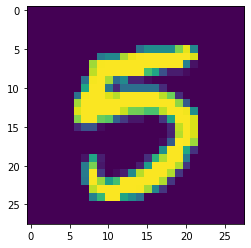

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [14]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(5)


# Generating MNIST Image with Noise

In [15]:
train= datasets.MNIST("",train=True,download=True,transform = transforms.Compose([transforms.ToTensor()]))

test= datasets.MNIST("",train=False,download=True,transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
new_testset = torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [16]:
def add_noise(dataset):
    noisy_data = []
    for data in dataset:
        img, _ = data[0], data[1]
        noisy_data += torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True))
    return noisy_data

train_gauss = add_noise(new_testset)

In [17]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001) #we optimize for loss, and accurary follows

EPOCHS = 3 #Epoch known as a full pass through, we are making 3 whole passes here.

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X,y = data
        #print(X[0])
        #print(y[0])
        #we get rows of pixels when printing
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y) 
        loss.backward() #backpropergate
        optimizer.step()
        print(loss)

tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.1159, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.2560, grad_fn=<NllLossBackward0>)
tensor(0.8488, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.3076, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.1093, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0624, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.7143, grad_fn=<NllLossBackward0>)
tensor(0.0419, grad_fn=<NllLossBackward0>)
tensor(0.4017, grad_fn=<NllLossBackward0>)
tensor(0.1363, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(1.0463, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(1.0762, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.1539, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0234, grad_fn=<NllLossBackward0>)
tensor(0.5163, grad_fn=<NllLossBackward0>)
tensor(0.3274, grad_fn=<NllLossBackward0>)
tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0795, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0230, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
tensor(0.1915, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.3062, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0396, grad_fn=<NllLossBackward0>)
tensor(0.2419, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0328, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0149, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.1676, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0551, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.7012, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0128, grad_fn=<NllLossBackward0>)
tensor(0.0468, grad_fn=<NllLossBackward0>)
tensor(0.2615, grad_fn=<NllLossBackward0>)
tensor(0.1307, grad_fn=<NllLossBackward0>)
tensor(0.0570, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0520, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.3278, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0654, grad_fn=<NllLossBackward0>)
tensor(0.0285, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0260, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1776, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0675, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0271, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0923, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0649, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0093, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.1940, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(9.30

tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0421, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0450, grad_fn=<NllLossBackward0>)
tensor(0.1160, grad_fn=<NllLossBackward0>)
tensor(0.1840, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0496, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.3587, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.1168, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0256, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.0973, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0080, grad_fn=<NllLossBackward0>)
tensor(0.2396, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.3337, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0112, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0292, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0507, grad_fn=<NllLossBackward0>)
tensor(0.0274, grad_fn=<NllLossBackward0>)
tensor(0.6141, grad_fn=<NllLossBackward0>)
tensor(0.0761, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.2155, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(1.0483, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.1000, grad_fn=<NllLossBackward0>)
tensor(0.1115, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.1274, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.0668, grad_fn=<NllLossBackward0>)
tensor(0.0701, grad_fn=<NllLossBackward0>)
tensor(0.0894, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.1062, grad_fn=<NllLossBackward0>)
tensor(0.1076, grad_fn=<NllLossBackward0>)
tensor(0.0901, grad_fn=<NllLossBackward0>)
tensor(0.0462, grad_fn=<NllLossBackward0>)
tensor(0.0151, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0592, grad_fn=<NllLossBackward0>)
tensor(0.5895, grad_fn=<NllLossBackward0>)
tensor(0.1025, grad_fn=<NllLossBackward0>)
tensor(0.0841, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2626, grad_fn=<NllLossBackward0>)
tensor(0.1016, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.1508, grad_fn=<NllLossBackward0>)
tensor(0.9357, grad_fn=<NllLossBackward0>)
tensor(0.0904, grad_fn=<NllLossBackward0>)
tensor(0.3418, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.0802, grad_fn=<NllLossBackward0>)
tensor(0.0725, grad_fn=<NllLossBackward0>)
tensor(0.3046, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.6037, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0415, grad_fn=<NllLossBackward0>)
tensor(0.0897, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.33

tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.0618, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0329, grad_fn=<NllLossBackward0>)
tensor(0.1109, grad_fn=<NllLossBackward0>)
tensor(0.1940, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.0214, grad_fn=<NllLossBackward0>)
tensor(0.0784, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0907, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.1168, grad_fn=<NllLossBackward0>)
tensor(0.0181, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0211, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0686, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0702, grad_fn=<NllLossBackward0>)
tensor(0.0923, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.2010, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0873, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.4196, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0129, grad_fn=<NllLossBackward0>)
tensor(0.1432, grad_fn=<NllLossBackward0>)
tensor(0.0632, grad_fn=<NllLossBackward0>)
tensor(0.3794, grad_fn=<NllLossBackward0>)
tensor(0.2566, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.0566, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0775, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2013, grad_fn=<NllLossBackward0>)
tensor(0.1380, grad_fn=<NllLossBackward0>)
tensor(0.0367, grad_fn=<NllLossBackward0>)
tensor(0.0561, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.1249, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0998, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.2316, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.1395, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.6272, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2262, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.1976, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0941, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0194, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0497, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.3967, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0879, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.11

tensor(0.1772, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.9520, grad_fn=<NllLossBackward0>)
tensor(0.1201, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0440, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.1107, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0201, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0193, grad_fn=<NllLossBackward0>)
tensor(0.0381, grad_fn=<NllLossBackward0>)
tensor(0.1965, grad_fn=<NllLossBackward0>)
tensor(0.0686, grad_fn=<NllLossBackward0>)
tensor(0.0284, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0427, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.1601, grad_fn=<NllLossBackward0>)
tensor(0.02

tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.1741, grad_fn=<NllLossBackward0>)
tensor(0.0718, grad_fn=<NllLossBackward0>)
tensor(0.0252, grad_fn=<NllLossBackward0>)
tensor(0.1006, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0241, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0178, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0300, grad_fn=<NllLossBackward0>)
tensor(5.9491e-05, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0207, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0449, grad_fn=<NllLossBackward0>)
tensor(0.0867, grad_fn=<NllLossBackward0>)
tensor(0.1095, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(0.0551, grad_fn=<NllLossBackward0>)
tensor(0.0283, grad_fn=<NllLossBackward0>)
tensor(0.1978, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.0486, grad_fn=<NllLossBackward0>)
tensor(0.4855, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0620, grad_fn=<NllLossBackward0>)
tensor(0.0225, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0739, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0518, grad_fn=<NllLossBackward0>)
tensor(0.0149, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0422, grad_fn=<NllLossBackward0>)
tensor(0.0116, grad_fn=<NllLossBackward0>)
tensor(0.2963, grad_fn=<NllLossBackward0>)
tensor(0.3936, grad_fn=<NllLossBackward0>)
tensor(0.1459, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.4201, grad_fn=<NllLossBackward0>)
tensor(0.0819, grad_fn=<NllLossBackward0>)
tensor(0.0560, grad_fn=<NllLossBackward0>)
tensor(0.0367, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0126, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0781, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.1808, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.5789, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.3755, grad_fn=<NllLossBackward0>)
tensor(0.0566, grad_fn=<NllLossBackward0>)
tensor(0.0620, grad_fn=<NllLossBackward0>)
tensor(0.5549, grad_fn=<NllLossBackward0>)
tensor(0.0099, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1340, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0844, grad_fn=<NllLossBackward0>)
tensor(0.4640, grad_fn=<NllLossBackward0>)
tensor(0.0237, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0272, grad_fn=<NllLossBackward0>)
tensor(0.05

tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(0.1689, grad_fn=<NllLossBackward0>)
tensor(0.1656, grad_fn=<NllLossBackward0>)
tensor(0.3045, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.0253, grad_fn=<NllLossBackward0>)
tensor(0.0965, grad_fn=<NllLossBackward0>)
tensor(0.1947, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0545, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1514, grad_fn=<NllLossBackward0>)
tensor(0.4178, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0295, grad_fn=<NllLossBackward0>)
tensor(0.1859, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0989, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0803, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0495, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0793, grad_fn=<NllLossBackward0>)
tensor(0.8167, grad_fn=<NllLossBackward0>)
tensor(0.0894, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0195, grad_fn=<NllLossBackward0>)
tensor(0.0247, grad_fn=<NllLossBackward0>)
tensor(0.2869, grad_fn=<NllLossBackward0>)
tensor(0.0242, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0828, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.3398, grad_fn=<NllLossBackward0>)
tensor(0.3377, grad_fn=<NllLossBackward0>)
tensor(0.0135, grad_fn=<NllLossBackward0>)
tensor(0.6512, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0650, grad_fn=<NllLossBackward0>)
tensor(0.2098, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.3636, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0151, grad_fn=<NllLossBackward0>)
tensor(0.2009, grad_fn=<NllLossBackward0>)
tensor(0.0478, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0999, grad_fn=<NllLossBackward0>)
tensor(0.2022, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0107, grad_fn=<NllLossBackward0>)
tensor(0.0360, grad_fn=<NllLossBackward0>)
tensor(0.0307, grad_fn=<NllLossBackward0>)
tensor(0.0146, grad_fn=<NllLossBackward0>)
tensor(0.2142, grad_fn=<NllLossBackward0>)
tensor(0.0218, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.1643, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.06

tensor(0.3096, grad_fn=<NllLossBackward0>)
tensor(0.0073, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.4410, grad_fn=<NllLossBackward0>)
tensor(0.0575, grad_fn=<NllLossBackward0>)
tensor(0.6911, grad_fn=<NllLossBackward0>)
tensor(0.0639, grad_fn=<NllLossBackward0>)
tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0526, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0214, grad_fn=<NllLossBackward0>)
tensor(0.0458, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.2701, grad_fn=<NllLossBackward0>)
tensor(0.1373, grad_fn=<NllLossBackward0>)
tensor(0.0786, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0222, grad_fn=<NllLossBackward0>)
tensor(0.1447, grad_fn=<NllLossBackward0>)
tensor(0.0942, grad_fn=<NllLossBackward0>)
tensor(0.1314, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.1068, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.1548, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0730, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.2065, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.0743, grad_fn=<NllLossBackward0>)
tensor(0.0307, grad_fn=<NllLossBackward0>)
tensor(0.0752, grad_fn=<NllLossBackward0>)
tensor(0.4373, grad_fn=<NllLossBackward0>)
tensor(0.0421, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0351, grad_fn=<NllLossBackward0>)
tensor(0.3247, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.4152, grad_fn=<NllLossBackward0>)
tensor(8.7263e-05, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0694, grad_fn=<NllLossBackward0>)
tensor(0.1209, grad_fn=<NllLossBackward0>)
tensor(0.1142, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.1875, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0463, grad_fn=<NllLossBackward0>)
tensor(0.0699, grad_fn=<NllLossBackward0>)
tensor(0.0901, grad_fn=<NllLossBackward0>)
tensor(0.0231, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0615, grad_fn=<NllLossBackward0>)
tensor(0.1347, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0633, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0313, grad_fn=<NllLossBackward0>)
tensor(0.2706, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0288, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0575, grad_fn=<NllLossBackward0>)
tensor(0.2094, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.2076, grad_fn=<NllLossBackward0>)
tensor(0.3206, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.2331, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0317, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.4810, grad_fn=<NllLossBackward0>)
tensor(0.0965, grad_fn=<NllLossBackward0>)
tensor(0.1350, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0196, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0770, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.3831, grad_fn=<NllLossBackward0>)
tensor(0.3286, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0389, grad_fn=<NllLossBackward0>)
tensor(0.0183, grad_fn=<NllLossBackward0>)
tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.1856, grad_fn=<NllLossBackward0>)
tensor(0.0352, grad_fn=<NllLossBackward0>)
tensor(0.2519, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0122, grad_fn=<NllLossBackward0>)
tensor(0.7975, grad_fn=<NllLossBackward0>)
tensor(0.1682, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0215, grad_fn=<NllLossBackward0>)
tensor(0.2351, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0469, grad_fn=<NllLossBackward0>)
tensor(0.0175, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0136, grad_fn=<NllLossBackward0>)
tensor(0.0330, grad_fn=<NllLossBackward0>)
tensor(0.0999, grad_fn=<NllLossBackward0>)
tensor(0.0480, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0344, grad_fn=<NllLossBackward0>)
tensor(0.0772, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0149, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.3828, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0626, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0238, grad_fn=<NllLossBackward0>)
tensor(0.0880, grad_fn=<NllLossBackward0>)
tensor(0.1615, grad_fn=<NllLossBackward0>)
tensor(0.1341, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.4901, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.2029, grad_fn=<NllLossBackward0>)
tensor(0.0394, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0399, grad_fn=<NllLossBackward0>)
tensor(0.0369, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.2941, grad_fn=<NllLossBackward0>)
tensor(2.7751e-05, grad_fn=<NllLossBackward0>)
tensor(0.0268, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0641, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.6402, grad_fn=<NllLossBackward0>)
tensor(0.0347, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0080, grad_fn=<NllLossBackward0>)
tensor(0.4518, grad_fn=<NllLossBackward0>)
tensor(0.0461, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.6266, grad_fn=<NllLossBackward0>)
tensor(0.0462, grad_fn=<NllLossBackward0>)
tensor(0.0522, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0384, grad_fn=<NllLossBackward0>)
tensor(0.0431, grad_fn=<NllLossBackward0>)
tensor(0.0135, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.2491, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0673, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.3606, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0218, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.2569, grad_fn=<NllLossBackward0>)
tensor(0.0530, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0459, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0133, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0224, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.2262, grad_fn=<NllLossBackward0>)
tensor(0.4809, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0506, grad_fn=<NllLossBackward0>)
tensor(0.0431, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0971, grad_fn=<NllLossBackward0>)
tensor(0.0586, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0294, grad_fn=<NllLossBackward0>)
tensor(0.03

tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.6789, grad_fn=<NllLossBackward0>)
tensor(0.2587, grad_fn=<NllLossBackward0>)
tensor(4.1506e-05, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.2911, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.1254, grad_fn=<NllLossBackward0>)
tensor(0.0228, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1259, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0054, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0610, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.2977, grad_fn=<NllLossBackward0>)
tensor(8.2261e-05, grad_fn=<NllLossBackward0>)
tensor(0.0364, grad_fn=<NllLossBackward0>)
ten

tensor(0.0648, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0694, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0249, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.4153, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1045, grad_fn=<NllLossBackward0>)
tensor(0.4296, grad_fn=<NllLossBackward0>)
tensor(0.0872, grad_fn=<NllLossBackward0>)
tensor(0.0421, grad_fn=<NllLossBackward0>)
tensor(0.0420, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.1261, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0266, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0329, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0087, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0678, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0986, grad_fn=<NllLossBackward0>)
tensor(0.1280, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.2948, grad_fn=<NllLossBackward0>)
tensor(0.1290, grad_fn=<NllLossBackward0>)
tensor(0.0098, grad_fn=<NllLossBackward0>)
tensor(0.0499, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0797, grad_fn=<NllLossBackward0>)
tensor(0.0494, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(9.4065e-05, grad_fn=<NllLossBackward0>)
tensor(0.0082, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0388, grad_fn=<NllLossBackward0>)
tensor(0.1337, grad_fn=<NllLossBackward0>)
tensor(0.1004, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0298, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.6740, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0935, grad_fn=<NllLossBackward0>)
tensor(0.0863, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0595, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0845, grad_fn=<NllLossBackward0>)
tensor(1.0392, grad_fn=<NllLossBackward0>)
tensor(0.1668, grad_fn=<NllLossBackward0>)
tensor(0.0729, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0337, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.2156, grad_fn=<NllLossBackward0>)
tensor(0.4347, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0216, grad_fn=<NllLossBackward0>)
tensor(0.0227, grad_fn=<NllLossBackward0>)
tensor(0.2822, grad_fn=<NllLossBackward0>)
tensor(0.0105, grad_fn=<NllLossBackward0>)
tensor(0.0201, grad_fn=<NllLossBackward0>)
tensor(0.0249, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.1528, grad_fn=<NllLossBackward0>)
tensor(0.0176, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0182, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(7.9601e-05, grad_fn=<NllLossBackward0>)
tensor(0.4623, grad_fn=<NllLossBackward0>)
tensor(0.0469, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0139, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0479, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.2483, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(2.3984e-05, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
ten

tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.1118, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0292, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.2050, grad_fn=<NllLossBackward0>)
tensor(0.0783, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0391, grad_fn=<NllLossBackward0>)
tensor(6.0100e-05, grad_fn=<NllLossBackward0>)
tensor(0.1100, grad_fn=<NllLossBackward0>)
tensor(0.0697, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0177, grad_fn=<NllLossBackward0>)
tensor(0.0238, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.4845, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.2849, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0108, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0346, grad_fn=<NllLossBackward0>)
tensor(0.0135, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.2692, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1840, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0088, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0245, grad_fn=<NllLossBackward0>)
tensor(0.0784, grad_fn=<NllLossBackward0>)
tensor(0.7618, grad_fn=<NllLossBackward0>)
tensor(1.2806, grad_fn=<NllLossBackward0>)
tensor(0.5079, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0185, grad_fn=<NllLossBackward0>)
tensor(0.1675, grad_fn=<NllLossBackward0>)
tensor(0.0364, grad_fn=<NllLossBackward0>)
tensor(0.42

tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.1679, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.6545, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.3269, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.2176, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.1668, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.0246, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0744, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0602, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0179, grad_fn=<NllLossBackward0>)
tensor(0.0158, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0187, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0271, grad_fn=<NllLossBackward0>)
tensor(0.0226, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0188, grad_fn=<NllLossBackward0>)
tensor(0.0383, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0690, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.1397, grad_fn=<NllLossBackward0>)
tensor(0.0663, grad_fn=<NllLossBackward0>)
tensor(0.1874, grad_fn=<NllLossBackward0>)
tensor(0.0229, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.0191, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0810, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.1894, grad_fn=<NllLossBackward0>)
tensor(0.0272, grad_fn=<NllLossBackward0>)
tensor(0.0869, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0836, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.0889, grad_fn=<NllLossBackward0>)
tensor(0.3280, grad_fn=<NllLossBackward0>)
tensor(0.0258, grad_fn=<NllLossBackward0>)
tensor(0.1021, grad_fn=<NllLossBackward0>)
tensor(0.0046, grad_fn=<NllLossBackward0>)
tensor(0.0885, grad_fn=<NllLossBackward0>)
tensor(0.0695, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0356, grad_fn=<NllLossBackward0>)
tensor(0.0138, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.2407, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0326, grad_fn=<NllLossBackward0>)
tensor(0.0206, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0645, grad_fn=<NllLossBackward0>)
tensor(0.0123, grad_fn=<NllLossBackward0>)
tensor(0.3259, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.4900, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.3284, grad_fn=<NllLossBackward0>)
tensor(0.0560, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.0131, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0233, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.2718, grad_fn=<NllLossBackward0>)
tensor(0.3908, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0089, grad_fn=<NllLossBackward0>)
tensor(0.0106, grad_fn=<NllLossBackward0>)
tensor(0.2680, grad_fn=<NllLossBackward0>)
tensor(0.0888, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1740, grad_fn=<NllLossBackward0>)
tensor(0.0321, grad_fn=<NllLossBackward0>)
tensor(0.0692, grad_fn=<NllLossBackward0>)
tensor(1.0967, grad_fn=<NllLossBackward0>)
tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.1154, grad_fn=<NllLossBackward0>)
tensor(0.0048, grad_fn=<NllLossBackward0>)
tensor(0.0651, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0232, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0155, grad_fn=<NllLossBackward0>)
tensor(0.0373, grad_fn=<NllLossBackward0>)
tensor(0.0408, grad_fn=<NllLossBackward0>)
tensor(0.0294, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.3394, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.10

tensor(0.0691, grad_fn=<NllLossBackward0>)
tensor(0.5351, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(0.0164, grad_fn=<NllLossBackward0>)
tensor(0.2524, grad_fn=<NllLossBackward0>)
tensor(0.0842, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0759, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1277, grad_fn=<NllLossBackward0>)
tensor(0.0096, grad_fn=<NllLossBackward0>)
tensor(0.0903, grad_fn=<NllLossBackward0>)
tensor(0.2676, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.2384, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0173, grad_fn=<NllLossBackward0>)
tensor(0.2061, grad_fn=<NllLossBackward0>)
tensor(0.0032, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0127, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(3.9324e-05, grad_fn=<NllLossBackward0>)
tensor(0.1541, grad_fn=<NllLossBackward0>)
tensor(0.3057, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0149, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0163, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(0.1286, grad_fn=<NllLossBackward0>)
tensor(0.0079, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0058, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0103, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0991, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0558, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.0927, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0093, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0163, grad_fn=<NllLossBackward0>)
tensor(0.0402, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0257, grad_fn=<NllLossBackward0>)
tensor(0.6386, grad_fn=<NllLossBackward0>)
tensor(0.2434, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.4677, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0057, grad_fn=<NllLossBackward0>)
tensor(0.1318, grad_fn=<NllLossBackward0>)
tensor(0.0462, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0525, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)
tensor(0.0192, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0414, grad_fn=<NllLossBackward0>)
tensor(0.4163, grad_fn=<NllLossBackward0>)
tensor(0.29

tensor(0.0093, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1147, grad_fn=<NllLossBackward0>)
tensor(0.0438, grad_fn=<NllLossBackward0>)
tensor(0.0989, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.4557, grad_fn=<NllLossBackward0>)
tensor(0.3993, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0660, grad_fn=<NllLossBackward0>)
tensor(0.0166, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0891, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.1726, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0212, grad_fn=<NllLossBackward0>)
tensor(0.0632, grad_fn=<NllLossBackward0>)
tensor(0.7892, grad_fn=<NllLossBackward0>)
tensor(0.0875, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.1368, grad_fn=<NllLossBackward0>)
tensor(0.2418, grad_fn=<NllLossBackward0>)
tensor(0.0952, grad_fn=<NllLossBackward0>)
tensor(0.4285, grad_fn=<NllLossBackward0>)
tensor(0.4280, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.3396, grad_fn=<NllLossBackward0>)
tensor(0.1380, grad_fn=<NllLossBackward0>)
tensor(0.0135, grad_fn=<NllLossBackward0>)
tensor(0.0120, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0499, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.3760, grad_fn=<NllLossBackward0>)
tensor(0.1563, grad_fn=<NllLossBackward0>)
tensor(0.0328, grad_fn=<NllLossBackward0>)
tensor(0.3447, grad_fn=<NllLossBackward0>)
tensor(0.2438, grad_fn=<NllLossBackward0>)
tensor(0.8118, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.1258, grad_fn=<NllLossBackward0>)
tensor(0.0190, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.1616, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0492, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0532, grad_fn=<NllLossBackward0>)
tensor(0.2682, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.1036, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0583, grad_fn=<NllLossBackward0>)
tensor(0.0347, grad_fn=<NllLossBackward0>)
tensor(0.0666, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.0153, grad_fn=<NllLossBackward0>)
tensor(0.0545, grad_fn=<NllLossBackward0>)
tensor(0.0727, grad_fn=<NllLossBackward0>)
tensor(0.0590, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0535, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.0254, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.04

tensor(0.1114, grad_fn=<NllLossBackward0>)
tensor(0.1298, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0836, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0395, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0733, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.1342, grad_fn=<NllLossBackward0>)
tensor(0.0407, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0150, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.7005, grad_fn=<NllLossBackward0>)
tensor(0.0807, grad_fn=<NllLossBackward0>)
tensor(0.0262, grad_fn=<NllLossBackward0>)
tensor(0.0453, grad_fn=<NllLossBackward0>)
tensor(0.09

tensor(0.0293, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(0.3026, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0402, grad_fn=<NllLossBackward0>)
tensor(0.0168, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0204, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(2.0324e-05, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(1.9299e-05, grad_fn=<NllLossBackward0>)
tensor(4.1337e-05, grad_fn=<NllLossBackward0>)

tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.0189, grad_fn=<NllLossBackward0>)
tensor(4.6180e-05, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0235, grad_fn=<NllLossBackward0>)
tensor(0.0811, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.2572, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0450, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.1529, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0804, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0326, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0052, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0313, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.0142, grad_fn=<NllLossBackward0>)
tensor(6.5148e-05, grad_fn=<NllLossBackward0>)
tensor(0.0247, grad_fn=<NllLossBackward0>)
tensor(0.1596, grad_fn=<NllLossBackward0>)
tensor(0.0036, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0118, grad_fn=<NllLossBackward0>)
tensor(0.1575, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.1281, grad_fn=<NllLossBackward0>)
tensor(0.1461, grad_fn=<NllLossBackward0>)
tensor(0.1455, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.1324, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.1438, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0384, grad_fn=<NllLossBackward0>)
tensor(0.0285, grad_fn=<NllLossBackward0>)
tensor(0.0064, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.1015, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0174, grad_fn=<NllLossBackward0>)
tensor(0.0402, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(2.4592e-05, grad_fn=<NllLossBackward0>)
tensor(0.0286, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(0.3633, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(3.4425e-05, grad_fn=<NllLossBackward0>)
tensor(0.0285, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0692, grad_fn=<NllLossBackward0>)
tensor(0.1585, grad_fn=<NllLossBackward0>)
ten

tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.1004, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0268, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.1490, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.2793, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0121, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0124, grad_fn=<NllLossBackward0>)
tensor(0.0357, grad_fn=<NllLossBackward0>)
tensor(0.01

tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.3120, grad_fn=<NllLossBackward0>)
tensor(0.0101, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0180, grad_fn=<NllLossBackward0>)
tensor(0.2846, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0081, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.2486, grad_fn=<NllLossBackward0>)
tensor(0.0737, grad_fn=<NllLossBackward0>)
tensor(2.1183e-05, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0242, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0240, grad_fn=<NllLossBackward0>)
tensor(0.0311, grad_fn=<NllLossBackward0>)
tensor(1.8966e-05, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(4.8408e-05, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.5142, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.2343, grad_fn=<NllLossBackward0>)
tensor(0.0333, grad_fn=<NllLossBackward0>)
tensor(0.0153, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.2785, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
ten

tensor(0.2239, grad_fn=<NllLossBackward0>)
tensor(0.1362, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0102, grad_fn=<NllLossBackward0>)
tensor(0.0559, grad_fn=<NllLossBackward0>)
tensor(0.0882, grad_fn=<NllLossBackward0>)
tensor(0.0958, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0381, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(3.7704e-05, grad_fn=<NllLossBackward0>)
tensor(0.1591, grad_fn=<NllLossBackward0>)
tensor(0.0623, grad_fn=<NllLossBackward0>)
tensor(8.7766e-05, grad_fn=<NllLossBackward0>)
tensor(0.0437, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.2949, grad_fn=<NllLossBackward0>)
tensor(0.0125, grad_fn=<NllLossBackward0>)
tensor(0.0071, grad_fn=<NllLossBackward0>)
tensor(0.1050, grad_fn=<NllLossBackward0>)
ten

tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0259, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0134, grad_fn=<NllLossBackward0>)
tensor(8.0154e-05, grad_fn=<NllLossBackward0>)
tensor(0.2209, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.1078, grad_fn=<NllLossBackward0>)
tensor(0.0246, grad_fn=<NllLossBackward0>)
tensor(0.0100, grad_fn=<NllLossBackward0>)
tensor(0.2213, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.0831, grad_fn=<NllLossBackward0>)
tensor(0.1465, grad_fn=<NllLossBackward0>)
tensor(0.1529, grad_fn=<NllLossBackward0>)
tensor(0.1591, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.1548, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0084, grad_fn=<NllLossBackward0>)
tensor(0.0111, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(4.5393e-05, grad_fn=<NllLossBackward0>)
tensor(0.4015, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0561, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.6414, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.2373, grad_fn=<NllLossBackward0>)
tensor(0.1348, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.1070, grad_fn=<NllLossBackward0>)
tensor(4.2481e-05, grad_fn=<NllLossBackward0>)
ten

tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0677, grad_fn=<NllLossBackward0>)
tensor(0.4294, grad_fn=<NllLossBackward0>)
tensor(5.3149e-05, grad_fn=<NllLossBackward0>)
tensor(0.0236, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0028, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0104, grad_fn=<NllLossBackward0>)
tensor(0.0764, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0606, grad_fn=<NllLossBackward0>)
tensor(0.0698, grad_fn=<NllLossBackward0>)
tensor(0.0159, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.9158, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.1454, grad_fn=<NllLossBackward0>)
tensor(0.0650, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.2615, grad_fn=<NllLossBackward0>)
tensor(0.0056, grad_fn=<NllLossBackward0>)
tensor(7.4078e-05, grad_fn=<NllLossBackward0>)
tensor(0.0411, grad_fn=<NllLossBackward0>)
tensor(0.1276, grad_fn=<NllLossBackward0>)
tensor(0.1478, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.2687, grad_fn=<NllLossBackward0>)
tensor(1.6510e-05, grad_fn=<NllLossBackward0>)
tensor(0.0062, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
ten

tensor(0.3806, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0884, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0144, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.0794, grad_fn=<NllLossBackward0>)
tensor(0.0172, grad_fn=<NllLossBackward0>)
tensor(9.2795e-05, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0085, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.2851, grad_fn=<NllLossBackward0>)
tensor(0.2122, grad_fn=<NllLossBackward0>)
tensor(0.0143, grad_fn=<NllLossBackward0>)
tensor(0.0090, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.3695, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.1209, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0092, grad_fn=<NllLossBackward0>)
tensor(0.0027, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0410, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0130, grad_fn=<NllLossBackward0>)
tensor(0.3653, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.0045, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0616, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.1256, grad_fn=<NllLossBackward0>)
tensor(0.2441, grad_fn=<NllLossBackward0>)
tensor(0.1861, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.1106, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0165, grad_fn=<NllLossBackward0>)
tensor(0.0536, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.1029, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(0.2651, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0097, grad_fn=<NllLossBackward0>)
tensor(0.6786, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0069, grad_fn=<NllLossBackward0>)
tensor(0.0448, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0077, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0465, grad_fn=<NllLossBackward0>)
tensor(0.0050, grad_fn=<NllLossBackward0>)
tensor(0.0140, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0220, grad_fn=<NllLossBackward0>)
tensor(0.0060, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0419, grad_fn=<NllLossBackward0>)
tensor(0.0223, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0095, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0043, grad_fn=<NllLossBackward0>)
tensor(0.0865, grad_fn=<NllLossBackward0>)
tensor(0.0156, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0051, grad_fn=<NllLossBackward0>)
tensor(0.2265, grad_fn=<NllLossBackward0>)
tensor(0.0280, grad_fn=<NllLossBackward0>)
tensor(0.2927, grad_fn=<NllLossBackward0>)
tensor(0.0030, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.4168, grad_fn=<NllLossBackward0>)
tensor(0.0211, grad_fn=<NllLossBackward0>)
tensor(0.0488, grad_fn=<NllLossBackward0>)
tensor(0.0214, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0335, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(0.0355, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0094, grad_fn=<NllLossBackward0>)
tensor(0.0113, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0049, grad_fn=<NllLossBackward0>)
tensor(0.6150, grad_fn=<NllLossBackward0>)
tensor(0.07

tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0157, grad_fn=<NllLossBackward0>)
tensor(0.0658, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.1057, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0022, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0034, grad_fn=<NllLossBackward0>)
tensor(0.0265, grad_fn=<NllLossBackward0>)
tensor(0.0074, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0023, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0574, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0209, grad_fn=<NllLossBackward0>)
tensor(0.6287, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0066, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.0966, grad_fn=<NllLossBackward0>)
tensor(0.0086, grad_fn=<NllLossBackward0>)
tensor(0.0010, grad_fn=<NllLossBackward0>)
tensor(0.1421, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0149, grad_fn=<NllLossBackward0>)
tensor(0.0024, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0742, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.1133, grad_fn=<NllLossBackward0>)
tensor(0.0177, grad_fn=<NllLossBackward0>)
tensor(0.0242, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0186, grad_fn=<NllLossBackward0>)
tensor(0.0053, grad_fn=<NllLossBackward0>)
tensor(0.00

tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.1087, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0607, grad_fn=<NllLossBackward0>)
tensor(0.0021, grad_fn=<NllLossBackward0>)
tensor(0.0211, grad_fn=<NllLossBackward0>)
tensor(0.2840, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0033, grad_fn=<NllLossBackward0>)
tensor(0.1861, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.2888, grad_fn=<NllLossBackward0>)
tensor(1.0133e-05, grad_fn=<NllLossBackward0>)
tensor(0.1714, grad_fn=<NllLossBackward0>)
tensor(0.0038, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0293, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(9.9162e-05, grad_fn=<NllLossBackward0>)
tensor(0.0151, grad_fn=<NllLossBackward0>)
tensor(0.0068, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
ten

tensor(0.1655, grad_fn=<NllLossBackward0>)
tensor(0.2031, grad_fn=<NllLossBackward0>)
tensor(0.5075, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.0047, grad_fn=<NllLossBackward0>)
tensor(0.6158, grad_fn=<NllLossBackward0>)
tensor(0.0250, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(9.2303e-05, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.8834, grad_fn=<NllLossBackward0>)
tensor(0.0007, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0182, grad_fn=<NllLossBackward0>)
tensor(0.0294, grad_fn=<NllLossBackward0>)
tensor(0.4650, grad_fn=<NllLossBackward0>)
tensor(0.1169, grad_fn=<NllLossBackward0>)
tensor(0.0017, grad_fn=<NllLossBackward0>)
tensor(0.2846, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0382, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.2258, grad_fn=<NllLossBackward0>)
tensor(0.0251, grad_fn=<NllLossBackward0>)
tensor(0.0075, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0004, grad_fn=<NllLossBackward0>)
tensor(0.0014, grad_fn=<NllLossBackward0>)
tensor(0.0055, grad_fn=<NllLossBackward0>)
tensor(0.0334, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.1447, grad_fn=<NllLossBackward0>)
tensor(0.0318, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(0.0198, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(4.7274e-05, grad_fn=<NllLossBackward0>)
tensor(0.0044, grad_fn=<NllLossBackward0>)
tensor(0.0065, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0059, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0141, grad_fn=<NllLossBackward0>)
tensor(0.1010, grad_fn=<NllLossBackward0>)
tensor(0.0061, grad_fn=<NllLossBackward0>)
tensor(0.0013, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.3929, grad_fn=<NllLossBackward0>)
tensor(0.0147, grad_fn=<NllLossBackward0>)
tensor(0.0006, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.1657, grad_fn=<NllLossBackward0>)
tensor(0.0778, grad_fn=<NllLossBackward0>)
tensor(0.2545, grad_fn=<NllLossBackward0>)
tensor(0.0039, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0276, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.5928, grad_fn=<NllLossBackward0>)
tensor(0.0040, grad_fn=<NllLossBackward0>)
tensor(0.1061, grad_fn=<NllLossBackward0>)
tensor(0.0117, grad_fn=<NllLossBackward0>)
tensor(0.5507, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0012, grad_fn=<NllLossBackward0>)
tensor(0.12

tensor(0.5701, grad_fn=<NllLossBackward0>)
tensor(0.1635, grad_fn=<NllLossBackward0>)
tensor(0.2796, grad_fn=<NllLossBackward0>)
tensor(1.2660, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0183, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.4534, grad_fn=<NllLossBackward0>)
tensor(0.0119, grad_fn=<NllLossBackward0>)
tensor(0.0554, grad_fn=<NllLossBackward0>)
tensor(0.0243, grad_fn=<NllLossBackward0>)
tensor(0.0504, grad_fn=<NllLossBackward0>)
tensor(0.1794, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0041, grad_fn=<NllLossBackward0>)
tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0067, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.5083, grad_fn=<NllLossBackward0>)
tensor(0.1949, grad_fn=<NllLossBackward0>)
tensor(0.0083, grad_fn=<NllLossBackward0>)
tensor(0.2257, grad_fn=<NllLossBackward0>)
tensor(0.4585, grad_fn=<NllLossBackward0>)
tensor(0.51

tensor(0.0174, grad_fn=<NllLossBackward0>)
tensor(0.0230, grad_fn=<NllLossBackward0>)
tensor(0.0199, grad_fn=<NllLossBackward0>)
tensor(0.0031, grad_fn=<NllLossBackward0>)
tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0029, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(6.3155e-05, grad_fn=<NllLossBackward0>)
tensor(0.0035, grad_fn=<NllLossBackward0>)
tensor(0.6316, grad_fn=<NllLossBackward0>)
tensor(0.1075, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0477, grad_fn=<NllLossBackward0>)
tensor(0.2639, grad_fn=<NllLossBackward0>)
tensor(0.0063, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0110, grad_fn=<NllLossBackward0>)
tensor(0.0603, grad_fn=<NllLossBackward0>)
tensor(0.0019, grad_fn=<NllLossBackward0>)
tensor(0.0368, grad_fn=<NllLossBackward0>)
tensor(0.0026, grad_fn=<NllLossBackward0>)
tensor(0.0078, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0009, grad_fn=<NllLossBackward0>)
tensor(0.0115, grad_fn=<NllLossBackward0>)
tensor(0.3382, grad_fn=<NllLossBackward0>)
tensor(0.0453, grad_fn=<NllLossBackward0>)
tensor(0.0905, grad_fn=<NllLossBackward0>)
tensor(0.2672, grad_fn=<NllLossBackward0>)
tensor(0.0072, grad_fn=<NllLossBackward0>)
tensor(0.0025, grad_fn=<NllLossBackward0>)
tensor(0.1420, grad_fn=<NllLossBackward0>)
tensor(0.0002, grad_fn=<NllLossBackward0>)
tensor(2.9885e-05, grad_fn=<NllLossBackward0>)
tensor(0.0016, grad_fn=<NllLossBackward0>)
tensor(0.0290, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(0.0011, grad_fn=<NllLossBackward0>)
tensor(0.0109, grad_fn=<NllLossBackward0>)
tensor(0.1801, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.0935, grad_fn=<NllLossBackward0>)
tensor(0.6517, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0070, grad_fn=<NllLossBackward0>)
tensor(0.0001, grad_fn=<NllLossBackward0>)
tensor(

tensor(0.0003, grad_fn=<NllLossBackward0>)
tensor(9.4252e-05, grad_fn=<NllLossBackward0>)
tensor(0.0008, grad_fn=<NllLossBackward0>)
tensor(0.1265, grad_fn=<NllLossBackward0>)
tensor(0.0287, grad_fn=<NllLossBackward0>)
tensor(0.0176, grad_fn=<NllLossBackward0>)
tensor(0.0114, grad_fn=<NllLossBackward0>)
tensor(0.0455, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)
tensor(0.0005, grad_fn=<NllLossBackward0>)
tensor(0.0161, grad_fn=<NllLossBackward0>)
tensor(0.0434, grad_fn=<NllLossBackward0>)
tensor(0.0037, grad_fn=<NllLossBackward0>)
tensor(0.2659, grad_fn=<NllLossBackward0>)
tensor(0.1708, grad_fn=<NllLossBackward0>)
tensor(0.1136, grad_fn=<NllLossBackward0>)
tensor(0.0152, grad_fn=<NllLossBackward0>)
tensor(0.0348, grad_fn=<NllLossBackward0>)
tensor(0.0160, grad_fn=<NllLossBackward0>)
tensor(0.5402, grad_fn=<NllLossBackward0>)
tensor(0.0340, grad_fn=<NllLossBackward0>)
tensor(0.0020, grad_fn=<NllLossBackward0>)
tensor(0.0042, grad_fn=<NllLossBackward0>)
tensor(

In [18]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct +=1
            total +=1
print("Accuracy: ",round(correct/total,3))


Accuracy:  0.986


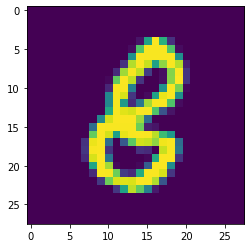

In [19]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(X[9].view(-1,784))[0]))

tensor(6)
